# Klasifikacija zloćudnog i dobroćudnog tumora dojke pomoću algoritama strojnog učenja


In [61]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


# 1. Uvod

Link članka: https://ieeexplore.ieee.org/document/9445249

Link dataseta: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

## Problem
Rak dojke jedan je najčešći zloćudni tumor kod žena. Nastaje kad normalne žljezdane stanice dojke promijene svojstva te počnu nekontrolirano rasti, umnožavati se i uništavati okkolno zdravo tkivo. Rak dojke je rezultat nekontroliranog rasta tkiva, tj. tumora. Tumor ne znači rak, tumor može biti dobroćudni i zloćudni. Testovi poput MRI, mamografa i ultrazvuka koriste se za dijagnozu raka dojke. 

## Informacije o podatkvonom skupu
Koristimo podatkvoni skup "Wisconsin Diagnostic Breast Cancer (WDBC)". Kreirao ga je Dr. William H. Wolberg, fizijatar na Sveučilištu Wisconsin-Madison. Značajke su izračunate iz digitalizirane slike aspirata dojke tankom iglom. Te značajke opisuju karakteristike staničnih jezgri prisutnih na slici. Jedan primjer takve slike je sljedeći:

<a href="https://www.researchgate.net/figure/A-magnified-image-of-a-malignant-breast-fine-needle-aspirate-Visible-cell-nuclei-are_fig1_311950799"><img src="https://www.researchgate.net/profile/Lucas-Borges-13/publication/311950799/figure/fig1/AS:444458983530496@1482978687857/A-magnified-image-of-a-malignant-breast-fine-needle-aspirate-Visible-cell-nuclei-are.png" alt="A magnified image of a malignant breast fine needle aspirate. Visible cell nuclei are outlined by a curve-fitting program. The Xcyt system also compares various features for each nucleus."/></a>

<cite>
Borges, Lucas. (2015). Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection. 
</cite>


Broj primjera: 569  
Broj atributa: 32 (ID, dijagnoza, 30 realnih značajki)  
Distribucija klasa: 357 dobroćudnih, 212 zloćudnih

## Opis značajki
+ 1) ID broj
+ 2) Dijagnoza: M = malignant (zloćudan) / B = benign (dobroćudan)  
+ 3-32) Deset realnih značajki izračunatih za stanične jezgre na slikama:
    + a) radijus (prosjek udaljenosti od centra do točki na granici jezgre)
    + b) tekstura (standardna devijacija sivo-bijelih vrijednosti)
    + c) opseg
    + d) površina
    + e) glatkoća (lokalna varijacija radijusa)
    + f) kompaktnost (opseg^2 / površina -  1.0)
    + g) konkavnost (intenzitet konkavnih dijelova konture)
    + h) konkavne točke (broj konkavnih dijelova konture)
    + i) simetrija (Razlika u duljini između linija okomitih na veliku os u oba smjera granice stanice)
    + j) fraktalna dimenzija ("aproksimacija obale". Veća vrijednost dovodi do manje normalne konture što predstavlja veći rizik zloćudnog tumora)

Srednja vrijednost, standardna pogreška i "najgora" ili najveća (srednja vrijednost od tri
najveće vrijednosti) ovih značajki izračunate su za svaku sliku,
što rezultira s 30 značajki. Na primjer, polje 3 je Srednji polumjer, polje
13 je radijus SE, polje 23 je najgori radijus.

Sve vrijednosti značajki su kodirane s četiri značajne znamenke.


# 2. Učitavanje i analiza podatkovnog skupa

Podatkovni skup učitavamo iz CSV dokumenta pomoću pandas bibilioteke.

In [62]:
# učitavanje CSV podataka, header je postavljen na None, jer inače podatke iz prvog retka postavlja kao imena stupaca
data = pd.read_csv('wdbc.data', header=None)
pd.set_option('display.max_columns', None) # prikazivanje svih stupaca
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Podatkovni skup ima **569 redaka** i **32 stupca**.

In [63]:
n_examples, n_features = data.shape
print(f'Broj primjera u skupu za podatke = {n_examples}\nBroj značajki = {n_features}')

Broj primjera u skupu za podatke = 569
Broj značajki = 32


Postavljamo imena značajki jer ih nismo dobili u CSV fajlu, već u drugom fajlu koji opisuje svaki redni broj značajke.

In [64]:
# pomoćna funkcija za generiranje columns dict (za mjenjanje imena značajki)
GENERIRAJ = False
if GENERIRAJ:
    for i in range(32):
        if i < 2:
            if i == 0:
                col_name = 'ID'
            else: 
                col_name = 'Diagnosis'
            print(f'\t\t{i}: "{col_name}",')
            continue
        
        names = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
            'Compactness', 'Concavity', 'Concave points', 'Symmetry', 'Fractal division']
        
        sufixes = ['Mean', 'SE', 'Worst']
        
        name_index = int((i-2) % 10)
        sufix_index = int((i-2) / 10)
        
        print(f'\t\t{i}: "{names[name_index]} {sufixes[sufix_index]}",')


# postavljanje imena značajki
data.rename(columns={
		0: "ID",
		1: "Diagnosis",
		2: "Radius Mean",
		3: "Texture Mean",
		4: "Perimeter Mean",
		5: "Area Mean",
		6: "Smoothness Mean",
		7: "Compactness Mean",
		8: "Concavity Mean",
		9: "Concave points Mean",
		10: "Symmetry Mean",
		11: "Fractal division Mean",
		12: "Radius SE",
		13: "Texture SE",
		14: "Perimeter SE",
		15: "Area SE",
		16: "Smoothness SE",
		17: "Compactness SE",
		18: "Concavity SE",
		19: "Concave points SE",
		20: "Symmetry SE",
		21: "Fractal division SE",
		22: "Radius Worst",
		23: "Texture Worst",
		24: "Perimeter Worst",
		25: "Area Worst",
		26: "Smoothness Worst",
		27: "Compactness Worst",
		28: "Concavity Worst",
		29: "Concave points Worst",
		30: "Symmetry Worst",
		31: "Fractal division Worst"
    }, 
    inplace=True)


Sada možemo prikazati i imena značajki.

In [65]:
data.columns.values

array(['ID', 'Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean',
       'Concavity Mean', 'Concave points Mean', 'Symmetry Mean',
       'Fractal division Mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave points SE', 'Symmetry SE', 'Fractal division SE',
       'Radius Worst', 'Texture Worst', 'Perimeter Worst', 'Area Worst',
       'Smoothness Worst', 'Compactness Worst', 'Concavity Worst',
       'Concave points Worst', 'Symmetry Worst', 'Fractal division Worst'],
      dtype=object)

# Tipovi podataka

Tipovi podataka koji postoje su: **int64**, **object** i **float64**. 

**ID** je tipa integer.  
**Diagnosis** je zapravo character koji može biti **M** ili **B** (malignant ili benign). Broj **dobroćudnih** primjera je **357**, a **zloćudnih** **212**, odnosno **62.74%** **dobroćudnih** i **37.26%** **zloćudnih**.  
Ostalih 30 stupaca sadrži realne brojeve koji imaju preciznost na 4 decimalna mjesta.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      569 non-null    int64  
 1   Diagnosis               569 non-null    object 
 2   Radius Mean             569 non-null    float64
 3   Texture Mean            569 non-null    float64
 4   Perimeter Mean          569 non-null    float64
 5   Area Mean               569 non-null    float64
 6   Smoothness Mean         569 non-null    float64
 7   Compactness Mean        569 non-null    float64
 8   Concavity Mean          569 non-null    float64
 9   Concave points Mean     569 non-null    float64
 10  Symmetry Mean           569 non-null    float64
 11  Fractal division Mean   569 non-null    float64
 12  Radius SE               569 non-null    float64
 13  Texture SE              569 non-null    float64
 14  Perimeter SE            569 non-null    fl

([<matplotlib.patches.Wedge at 0x208adc68c10>,
 [Text(-0.42865488965309717, 1.0130424401655103, 'B'),
  Text(0.42865498450097356, -1.0130424000319387, 'M')],
 [Text(-0.2338117579925984, 0.5525686037266418, '62.74'),
  Text(0.23381180972780374, -0.5525685818356029, '37.26')])

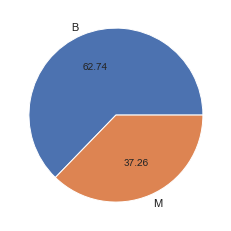

In [67]:
count_per_diagnosis = data.groupby('Diagnosis').count().loc[:, 'ID'].values
title_name = data.groupby('Diagnosis').count().index.values
percent = (count_per_diagnosis / len(data)) * 100
plt.pie(percent, labels=title_name, autopct='%.2f')

**ID** je samo jedinstveni identifikator za određeni primjer. Taj podatak nam ne donosi nikakve korisne informacije za analizu podataka, pa ćemo ga izbaciti.

In [68]:
data.drop(['ID'], axis=1, inplace=True)
data.head()

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal division Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal division SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal division Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Promjenit ćemo značajku **Dijagnoza** u numeričku varijablau. **0** za **dobroćudni** tumor, a **1** za **zloćudni**.

In [69]:
data['Diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
data

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal division Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal division SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal division Worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Nedostajući podaci

Provjeravamo postoje li nedostajući podaci. U našem slučaju ne postoje takvi podaci.

In [70]:
(data.isna().sum() != 0).sum()

0

# Vizualizacija i analiza podataka

In [71]:
data

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal division Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal division SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal division Worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Histogram značajki

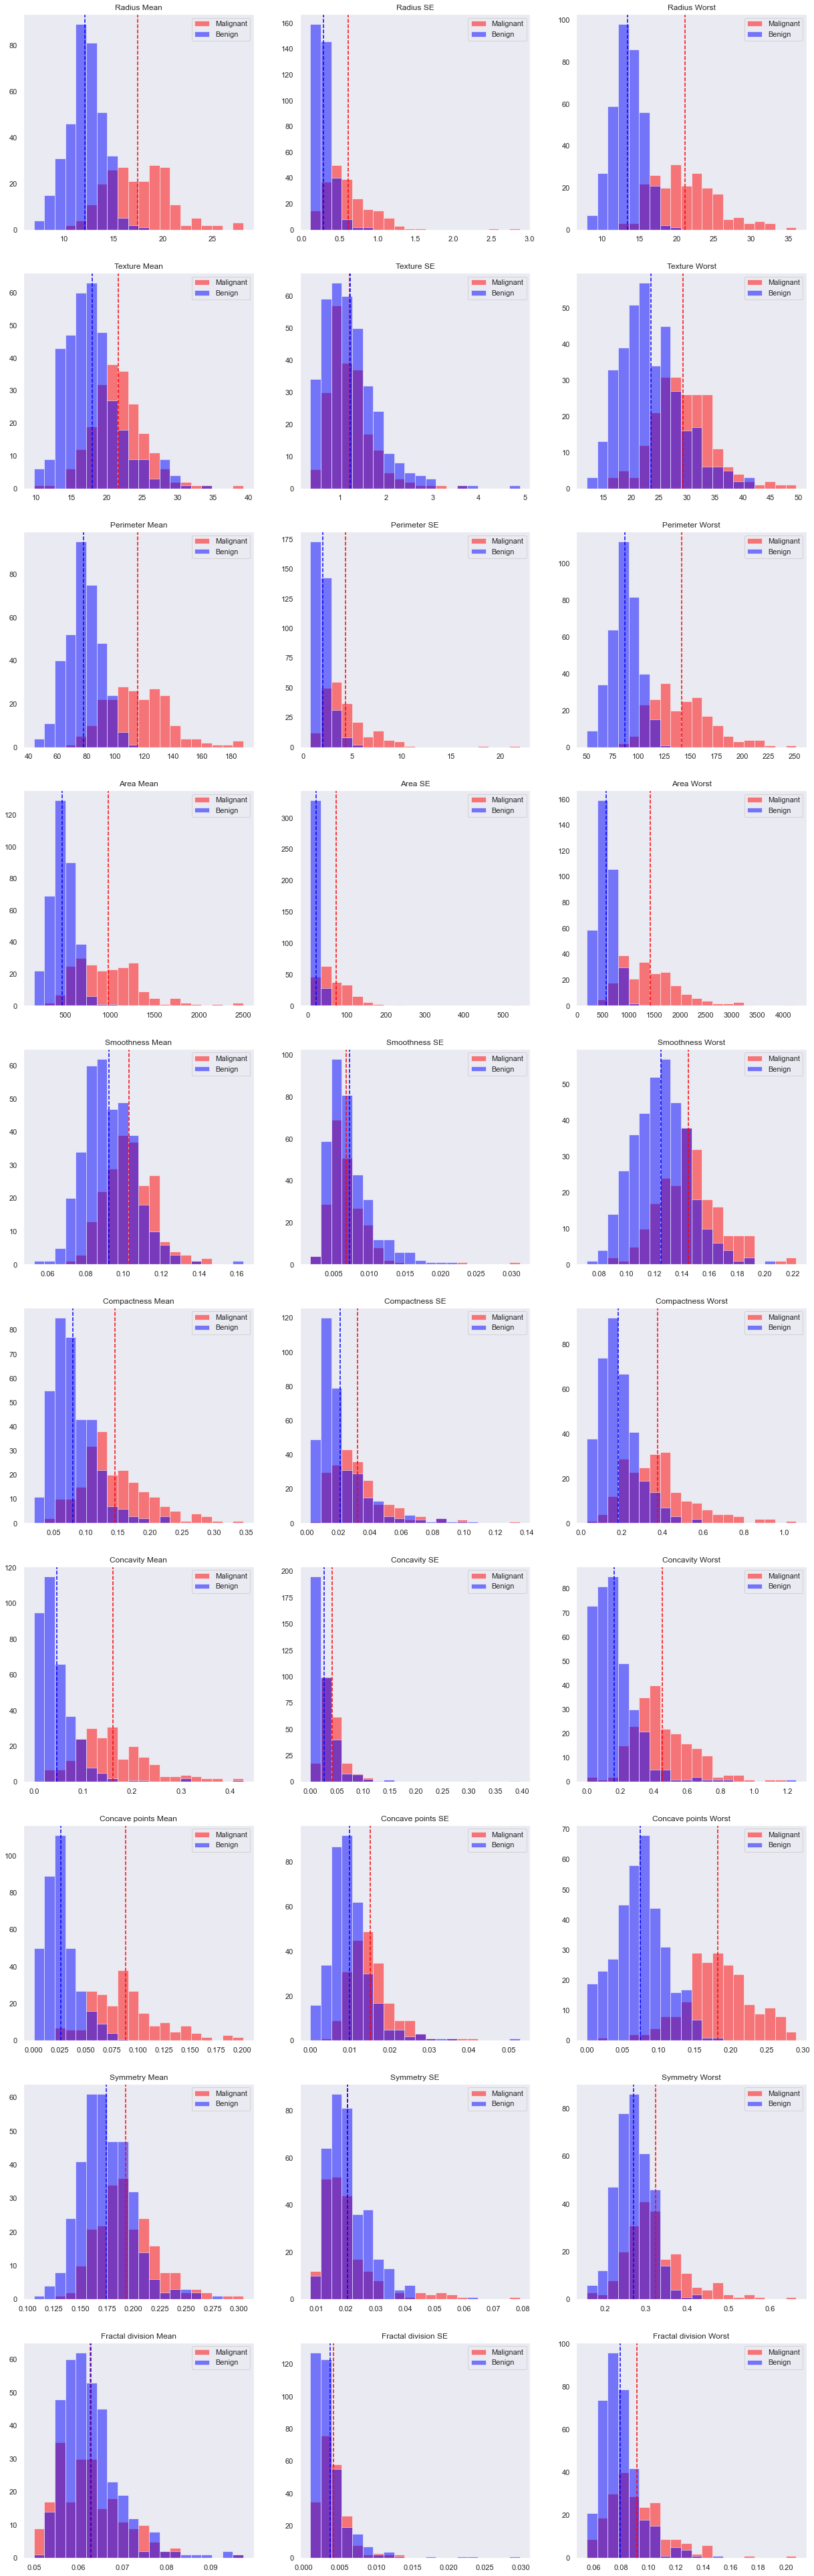

In [72]:
def plot_hist_feature_by_diagnosis(ax, feature_name):
    feature_min = data[feature_name].min() # moramo ograničiti range histograma na (min, max) kako bi širina stupca bila jednaka za obje dijagnoze
    feature_max = data[feature_name].max()
    ax.hist(data.loc[data['Diagnosis']==1, feature_name], bins=20, alpha=0.5, color='red', label='Malignant', range=(feature_min, feature_max))
    ax.hist(data.loc[data['Diagnosis']==0, feature_name], bins=20, alpha=0.5, color='blue', label='Benign', range=(feature_min, feature_max))
    ax.axvline(data.loc[data['Diagnosis']==1, feature_name].mean(), color='red', linestyle='dashed')
    ax.axvline(data.loc[data['Diagnosis']==0, feature_name].mean(), color='blue', linestyle='dashed')
    ax.set_title(feature_name)
    ax.legend(loc='best')
    ax.grid()

fig, ax = plt.subplots(10, 3, figsize=(21, 70))
for i, column_name in enumerate(data.columns[1:]):
    plt_row = i % 10
    plt_col = int(i / 10)
    plot_hist_feature_by_diagnosis(ax[plt_row, plt_col], column_name)

Na ovim histogramima vidimo distribuciju značajki u ovisnosti o dijagnozi. Vertikalnim isprekidanim crtama su označene srednje vrijednosti podataka.

Dobru **separaciju po vrsti tumora** imamo kod značajki: **Radius**, **Perimeter**, **Concavity**, **Concave points** (Tu se misli na skup od 3 značajke: Mean, SE, Worst)  
Jako **sličnu distribuciju** imaju značajke: **Texture SE**, **Symmetry SE**, **Fractal division Mean**

### Boxplot značajki

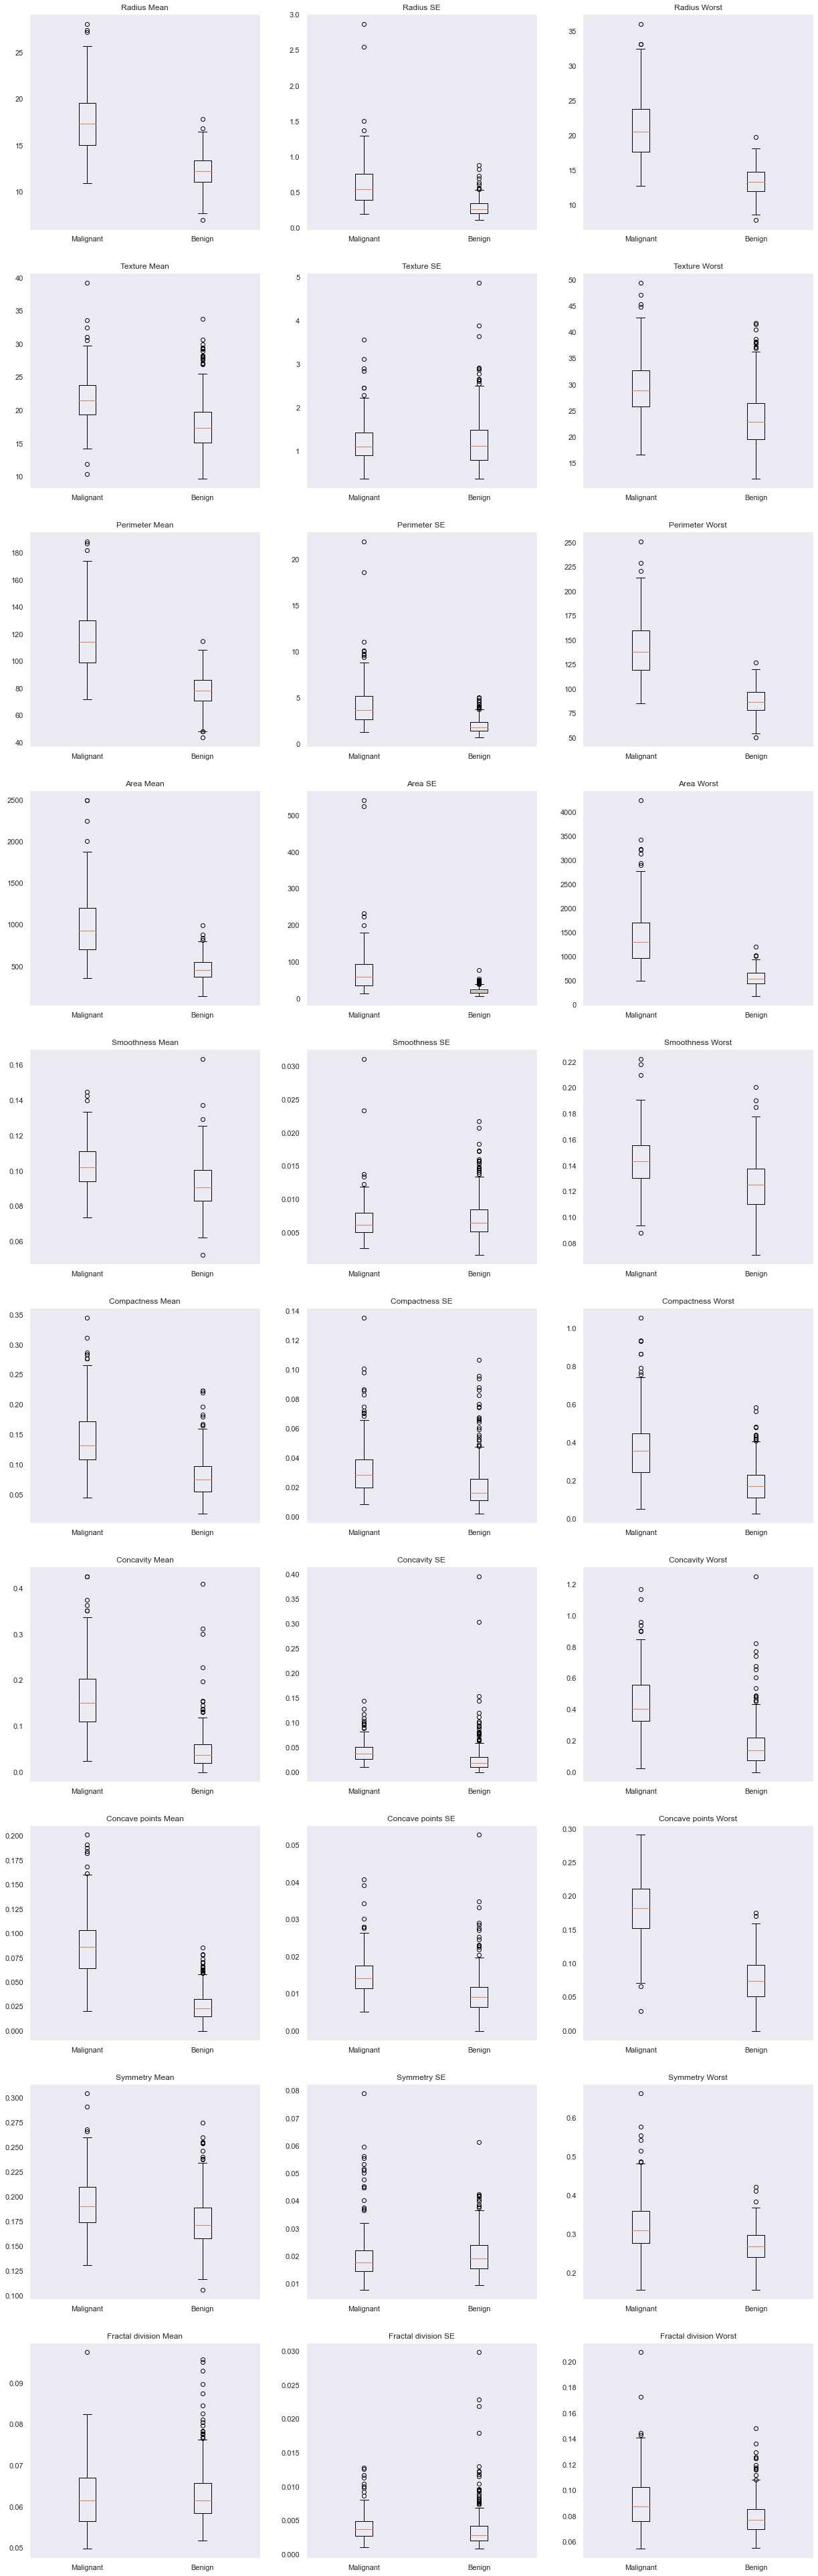

In [73]:
def plot_boxplot_feature_by_diagnosis(ax, feature_name):
    boxplot_data = [data.loc[data['Diagnosis']==1, feature_name], data.loc[data['Diagnosis']==0, feature_name]]
    ax.boxplot(boxplot_data)
    ax.set_xticks([1, 2], ['Malignant', 'Benign'])
    ax.set_title(feature_name)
    ax.grid()

fig, ax = plt.subplots(10, 3, figsize=(21, 70))
for i, column_name in enumerate(data.columns[1:]):
    plt_row = i % 10
    plt_col = int(i / 10)
    plot_boxplot_feature_by_diagnosis(ax[plt_row, plt_col], column_name)

Većina značajki ima stršeće vrijednosti. Mi nećemo ništa poduzimati u vezi toga, npr. izbacivati takve vrijednosti. Bitno je to imati na umu dok analiziramo podatke.

### Korelacijska matrica

c:\Users\Antonio\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Antonio\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


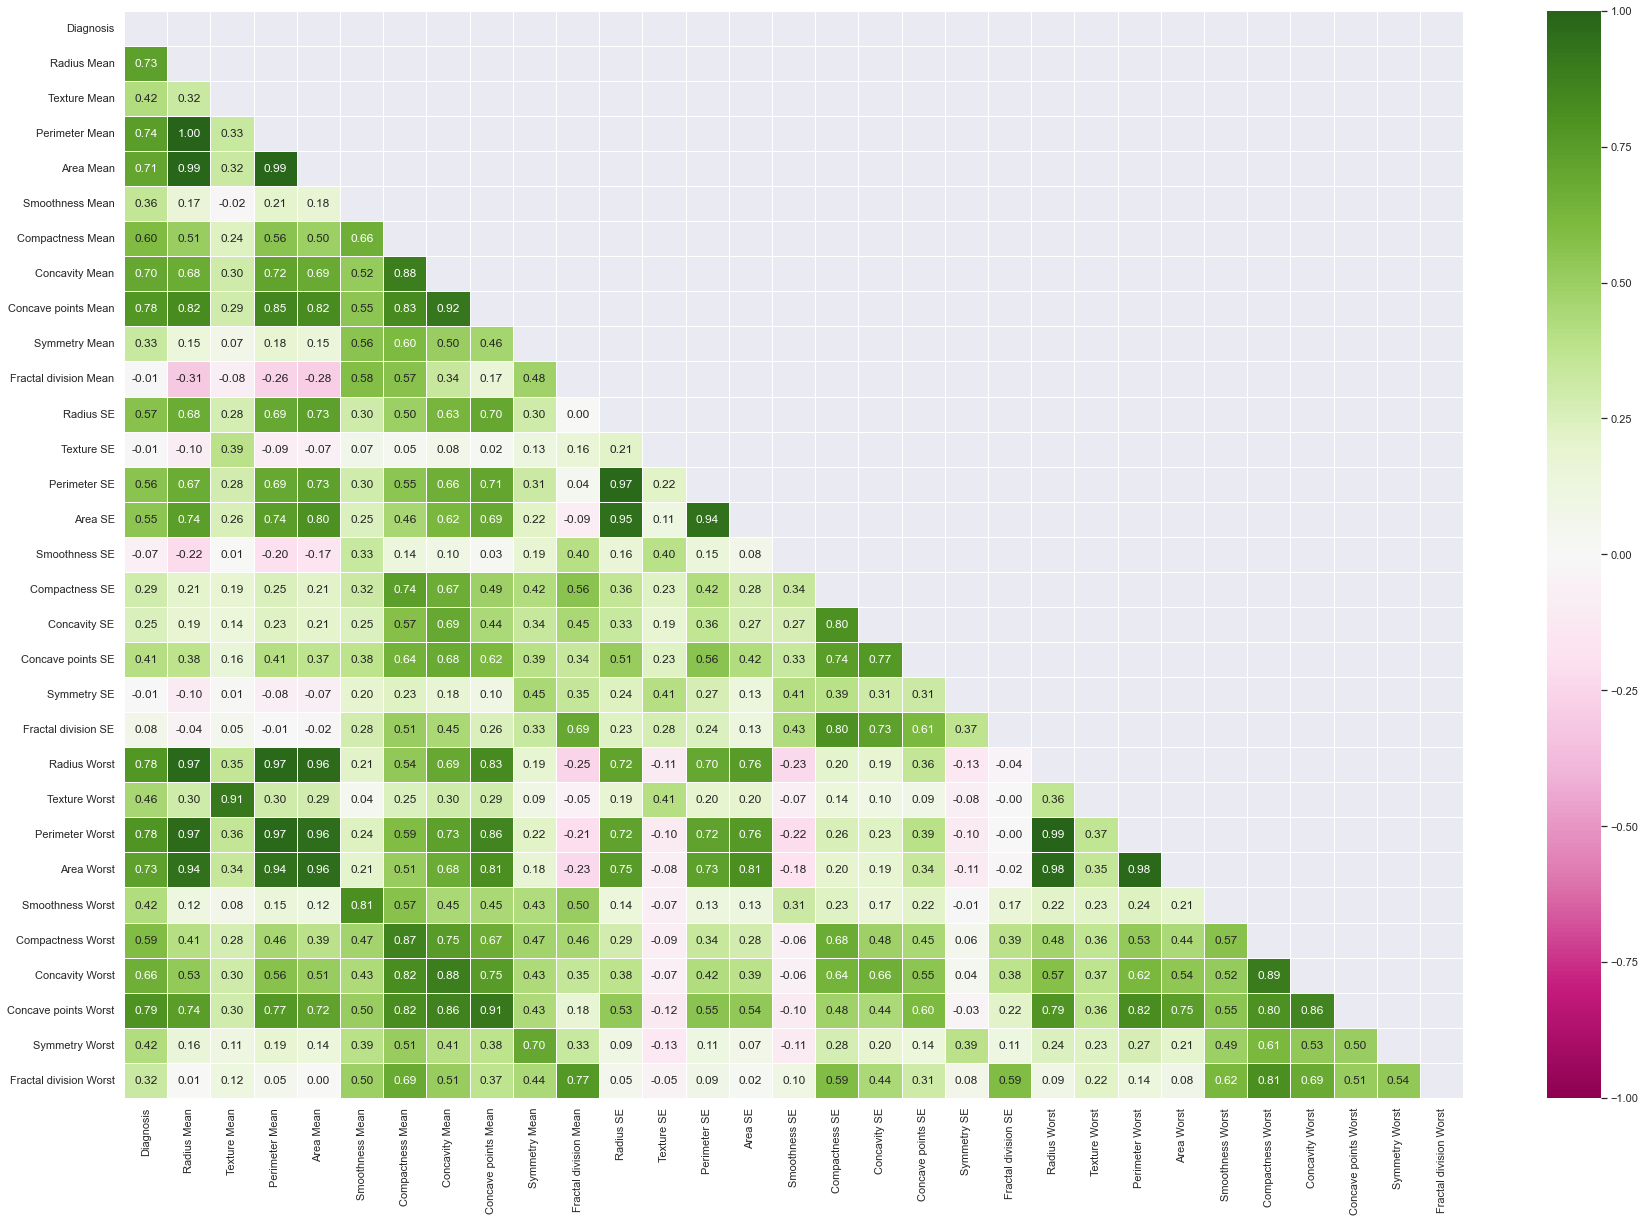

In [74]:
sns.set(rc={'figure.figsize':(30,20)})
mask = np.triu(np.ones((31, 31)))
sns.heatmap(data.corr(), mask=mask, annot=True, fmt=".2f", cmap="PiYG", linewidths=.5, vmin=-1.0, vmax=1.0)
plt.show()

Ova matrica prikazuje korelacijsku matricu za sve parove značajki.  
U takvoj matrici vidimo kakva je korelacija između dvije značajke u svakom polju matrice. Iznos korelacije opisan je intenzitetom boje i brojem od -1 do 1. Ako imamo pozitivnu korelaciju, povećanje jedne značajke će dovesti do povećanja druge.  


c:\Users\Antonio\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Antonio\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


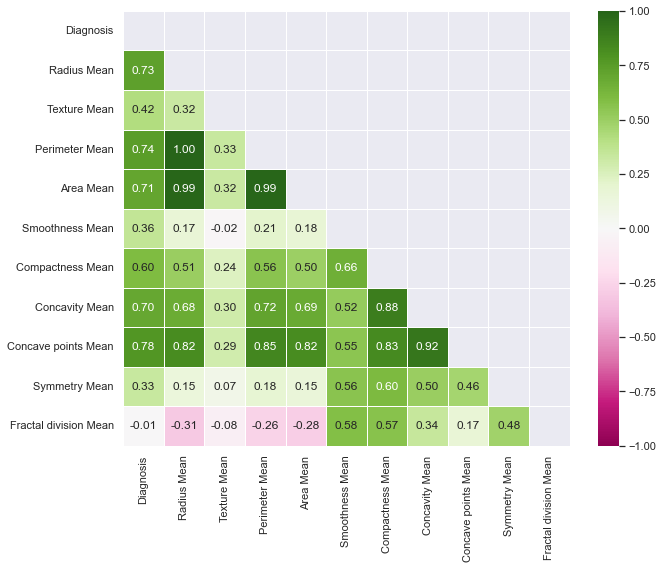

In [75]:
sns.set(rc={'figure.figsize':(10,8)})
mask = np.triu(np.ones((11, 11)))
sns.heatmap(data.iloc[:, 0:11].corr(), mask=mask, annot=True, fmt=".2f", cmap="PiYG", linewidths=.5, vmin=-1.0, vmax=1.0)
plt.show()

Ova korelacijska matrica prikazuje korelacije između srednjih vrijednosti (10 značajki) i dijagnoze. 

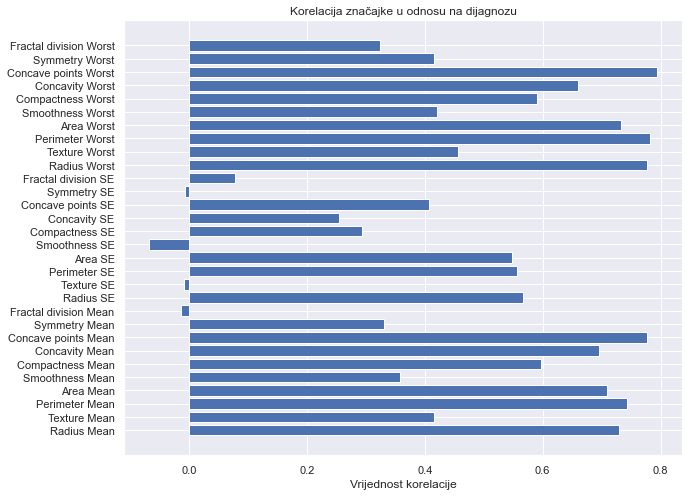

In [76]:
corr_with_respect_to_diagnosis = data.corrwith(data['Diagnosis'])
corr_values = corr_with_respect_to_diagnosis.values[1:]
corr_labels = corr_with_respect_to_diagnosis.index.values[1:]

fig, ax = plt.subplots()
y_pos = np.arange(len(corr_values))
hbars = ax.barh(y_pos, corr_values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(corr_labels)
ax.set_title('Korelacija značajke u odnosu na dijagnozu')
ax.set_xlabel('Vrijednost korelacije')
plt.show()

Ovaj barplot prikazuje kolika je korelacija značajki u odnosu na dijagnozu. Smoothness SE ima najveću negativnu korelaciju s dijagnozom. To znači da povećanje vrijednosti te značajke dovodi do manje vjerojatnosti da je tumor maliciozan.  
Većina značajki ima visoku pozitivnu korelaciju s dijagnozom. **Najveće 3 korelacije** imaju ove značajke: **Concave points worst**, **Perimeter worst** i **Radius worst**.  
Značajke s **manjom korelacijom** (npr. **Fractal division mean**, **Texture se**, **Symmetry SE**) možemo maknuti iz skupa jer nemaju prevelik utjecaj na ciljnu značajku odnosno dijagnozu. Takvim uklanjanjem zapravo radimo **odabir značajki**. To će dovesti do **jednostavnijeg modela** i trebalo bi povećati **točnost modela**.

### Scatter plot

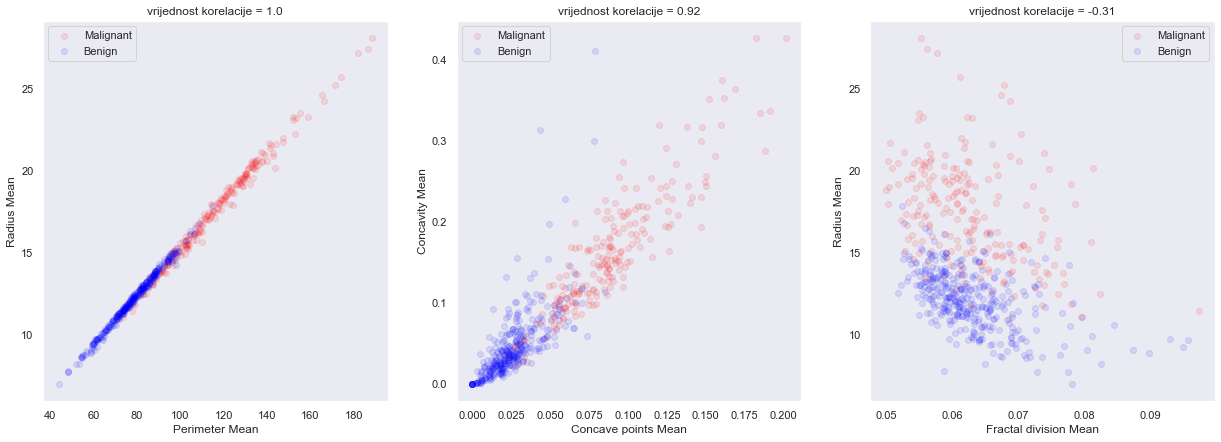

In [77]:
pos_data = data.loc[data['Diagnosis']==1, :]
neg_data = data.loc[data['Diagnosis']==0, :]


def plot_scatter_feature_by_diagnosis(ax, feature_name_1, feature_name_2, correlation_value):
    ax.scatter(pos_data.loc[:, feature_name_1], pos_data.loc[:, feature_name_2], alpha=0.1, color='red', label='Malignant')
    ax.scatter(neg_data.loc[:, feature_name_1], neg_data.loc[:, feature_name_2], alpha=0.1, color='blue', label='Benign')
    ax.set_xlabel(feature_name_1)
    ax.set_ylabel(feature_name_2)
    ax.set_title(f'vrijednost korelacije = {correlation_value}')
    ax.legend(loc='best')
    ax.grid()

fig, ax = plt.subplots(1, 3, figsize=(21, 7))
plot_scatter_feature_by_diagnosis(ax[0], 'Perimeter Mean', 'Radius Mean', 1.00)
plot_scatter_feature_by_diagnosis(ax[1], 'Concave points Mean', 'Concavity Mean', 0.92)
plot_scatter_feature_by_diagnosis(ax[2], 'Fractal division Mean', 'Radius Mean', -0.31)

Odaberimo parove značajki (ne uključujući dijagnozu) koji imaju visoku i nisku korelaciju. Još jedan način kako otkriti korelaciju značajki je pomoću scatter plota. Odaberimo parove značajki (Perimeter mean, Radius mean), (Concave points mean, Concavity mean), (Fractal division mean, Radius mean).  

Vrijednosti korelacija ova 3 para značajki možemo isčitati iz matrice korelacija.  

(Perimeter mean, Radius mean) -> korelacija 1.00, ove značajke donosee skoro istu informaciju.   
(Concave points mean, Concavity mean) -> visoka korelacija, blizu 1.00  
(Fractal division mean, Radius mean) -> blago negativna korelacija, ove dvije značajke nisu jako korelirane

## Treniranje modela

In [78]:
# import potrebnih funkcija
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from tabulate import tabulate

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# kod treniranja logističkog modela izbacivalo bi ConvergenceWarning
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning) 

from sklearn.model_selection import GridSearchCV

In [79]:
def visualize_confusion_matrix(cfm):
    '''
    cfm: confusion matrix
    '''
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cfm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cfm.flatten()/np.sum(cfm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues')



def train_and_evaluate_model(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    train_predicted_y = model.predict(train_x)
    test_predicted_y = model.predict(test_x)
    cfm = confusion_matrix(test_y, test_predicted_y)

    train_accuracy = accuracy_score(train_y, train_predicted_y)
    train_precision = precision_score(train_y, train_predicted_y)
    train_recall = recall_score(train_y, train_predicted_y)
    train_f1 = f1_score(train_y, train_predicted_y)

    test_accuracy = accuracy_score(test_y, test_predicted_y)
    test_precision = precision_score(test_y, test_predicted_y)
    test_recall = recall_score(test_y, test_predicted_y)
    test_f1 = f1_score(test_y, test_predicted_y)

    scores = {
        'train_accuracy_score' : train_accuracy,
        'train_precision_score' : train_precision, 
        'train_recall_score' : train_recall, 
        'train_f1_score' : train_f1,

        'test_accuracy_score' : test_accuracy,
        'test_precision_score' : test_precision, 
        'test_recall_score' : test_recall, 
        'test_f1_score' : test_f1
    }

    return scores, cfm


def print_model_scores(scores, cfm):
    print(scores)
    print(cfm)


def evaluate_all_6_models_and_print_results(train_x, train_y, test_x, test_y):
    models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), SVC()]
    models_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM']

    models_train_accuracies = {}
    models_test_accuracies = {}
    models_train_precision_scores = {}
    models_test_precision_scores = {}
    models_train_recall_scores = {}
    models_test_recall_scores = {}
    models_train_f1_scores = {}
    models_test_f1_scores = {}

    # skaliraj veličinu figure plt
    plt.rcParams["figure.figsize"] = (5*len(models),5)

    for i, (model, model_name) in enumerate(zip(models, models_names)):
        scores, cfm = train_and_evaluate_model(model, train_x, train_y, test_x, test_y)

        # nacrtaj matricu zabune, confusion matrix (cfm)
        plt.subplot(1, len(models), i+1)
        visualize_confusion_matrix(cfm)
        plt.title(model_name)

        models_train_accuracies[model_name] = scores['train_accuracy_score']
        models_test_accuracies[model_name] = scores['test_accuracy_score']
        models_train_precision_scores[model_name] = scores['train_precision_score']
        models_test_precision_scores[model_name] = scores['test_precision_score']
        models_train_recall_scores[model_name] = scores['train_recall_score']
        models_test_recall_scores[model_name] = scores['test_recall_score']
        models_train_f1_scores[model_name] = scores['train_f1_score']
        models_test_f1_scores[model_name] = scores['test_f1_score']

    # resetiraj veličinu figure plt
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


    table = [['Algorithms', 'Training Accuracy', 'Testing Accuracy', 'Train Precision Score', 'Test Precision Score', 'Train Recall Score', 'Test Recall Score', 'Train F1 Score', 'Test F1 Score']]
    for model_name in models_names:
        table.append([model_name,
            f'{models_train_accuracies[model_name]*100:.2f}%',
            f'{models_test_accuracies[model_name]*100:.2f}%',
            f'{models_train_precision_scores[model_name]*100:.2f}%',
            f'{models_test_precision_scores[model_name]*100:.2f}%',
            f'{models_train_recall_scores[model_name]*100:.2f}%',
            f'{models_test_recall_scores[model_name]*100:.2f}%',
            f'{models_train_f1_scores[model_name]*100:.2f}%',
            f'{models_test_f1_scores[model_name]*100:.2f}%',
        ])

    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

### Rezultati modela bez odabira značajki

╒═════════════════════╤═════════════════════╤════════════════════╤═════════════════════════╤════════════════════════╤══════════════════════╤═════════════════════╤══════════════════╤═════════════════╕
│ Algorithms          │ Training Accuracy   │ Testing Accuracy   │ Train Precision Score   │ Test Precision Score   │ Train Recall Score   │ Test Recall Score   │ Train F1 Score   │ Test F1 Score   │
╞═════════════════════╪═════════════════════╪════════════════════╪═════════════════════════╪════════════════════════╪══════════════════════╪═════════════════════╪══════════════════╪═════════════════╡
│ Logistic Regression │ 94.60%              │ 94.41%             │ 94.74%                  │ 89.47%                 │ 90.57%               │ 96.23%              │ 92.60%           │ 92.73%          │
├─────────────────────┼─────────────────────┼────────────────────┼─────────────────────────┼────────────────────────┼──────────────────────┼─────────────────────┼──────────────────┼─────────────────┤


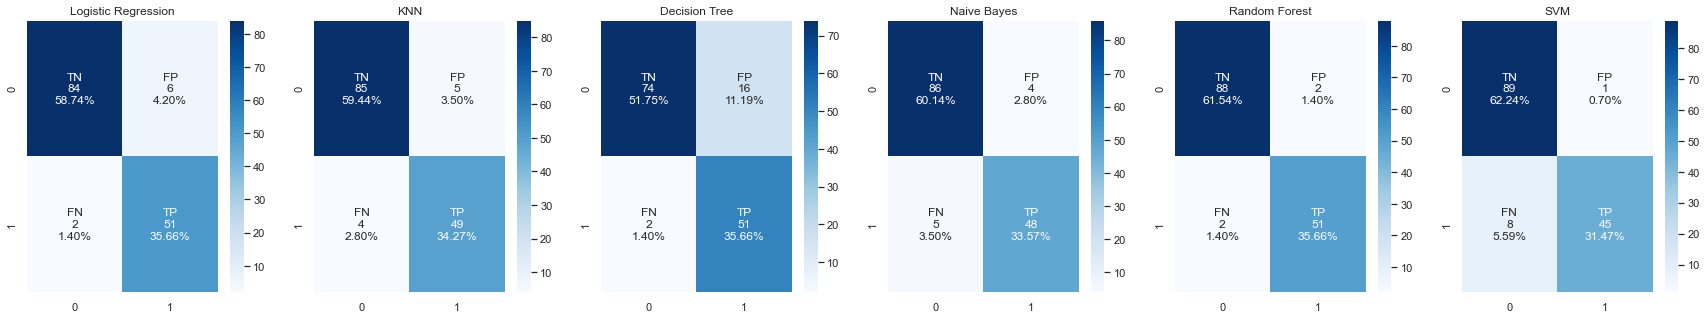

In [80]:
# izrada skupa podataka za treniranje i testiranje (bez odabira značajki)

train, test = train_test_split(data, test_size=0.25, random_state=0)

data_columns = data.columns.values[1:]
label_column = 'Diagnosis'

train_x = train[data_columns]
train_y = train[label_column]
test_x = test[data_columns]
test_y = test[label_column]

evaluate_all_6_models_and_print_results(train_x, train_y, test_x, test_y)

Random Forest classifier se najbolje ponaša na testnom skupu kad ne radimo odabir značajki.

### Odabir značajki pomoću koeficijenta korelacije

Odabiremo samo one značajke koje imaju korelaciju jednaku ili veću od zadane u odnosu na ciljnu značajku. Dodatno izbacujemo značajke koje su međusobno visoko korelirane. Odnosno kod para visoko koreliranih značajki izbacujemo onu koja ima manju korelaciju s ciljnom značajkom.

In [81]:
def select_features(data=data, MIN_CORR_TO_LABEL=0.5, MAX_CORR_TO_OTHER_FEATURE=0.8):
    '''
    Metoda koja odabire značajke.
    
    Prvo se gleda korelacija svih značajki prema ciljnoj oznaci. Ako je korelacija značajke prema ciljnoj oznaci manja od zadanog argumenta, ta značajka se izbacuje.
    Ovo se radi zato što ako imamo značajku koja je jako malo korelirana sa ciljnom značajkom, takva značajka nam neće pridonositi predikciji pa je možemo izbaciti.

    Ako postoji visoka korelacija između para značajki, to znači da iz jedne značajke možemo odrediti drugu. Zbog toga nam ne trebaju obje značajke, pa ćemo izbaciti onu koja je manje korelirana sa ciljnom oznakom.
    Dok god postoji par preostalih značajki čija je korelacija veća od zadanog argumenta, izbacujemo onu koja je manje korelirana sa ciljnom oznakom.
    '''

    # setovi koji sadrže imena i indekse značajki koje ćemo izbaciti
    removed_features_labels = set()
    removed_features_indexes = set()

    # prvi stupac matrice data.corr() ima korelacije u odnosu na ciljnu značajku
    corr_labels = data.corr().index.values
    corr_matrix = data.corr().values
    num_features = corr_matrix.shape[0]

    # indeksi značajki koje još nisu filtrirane
    not_removed_features_indexes = set(range(1, num_features))
    
    # izbaci značajke koje nisu dovoljno korelirane sa ciljnom oznakom
    for i in range(1, num_features):
        if corr_matrix[0, i] < MIN_CORR_TO_LABEL:
            removed_features_indexes.add(i)
            not_removed_features_indexes.remove(i)

    # uklananje međusobno koreliranih značajki. Algoritam: za svaku značajku iteriramo i (osim ciljne značajke) gledamo postoji li neka značajka s kojom ima korelaciju veću od dozvoljene
    # i da pritom nije već izbačena. Ako postoji takva značajka koja uz sve uvjete ima još i veću korelaciju s ciljnom značajkom naspram druge s kojom uspoređujemo, ovu trenutnu izbacujemo.
    for i in range(1, num_features):
        # ako je značajka već izbačena, nastavi petlju
        if i in removed_features_indexes:
            continue

        # startamo od indeksa i+1 jer nas ne zanima korelacija prema ciljnoj značajki
        for j in range(i+1, num_features):
            # ne uspoređujemo s već izbačenim značajkama
            if j in removed_features_indexes:
                continue

            corr_i_j = corr_matrix[i, j]
            if corr_i_j >= MAX_CORR_TO_OTHER_FEATURE:
                # ako je vrijednost korelacije na indeksu i manja od one na indeksu j. Ako je, izbacujemo onu na indeksu i jer je ova na j "bolja"
                corr_i_to_label = corr_matrix[i, 0]
                corr_j_to_label = corr_matrix[j, 0]
                if corr_i_to_label <= corr_j_to_label:
                    removed_features_indexes.add(i)
                    not_removed_features_indexes.remove(i)
                    break
    
    # vrati imena značajki koje su odabrane
    return corr_labels[list(not_removed_features_indexes)]


MIN_CORR_TO_LABEL=0.5
MAX_CORR_TO_OTHER_FEATURE=1.0
selected_features = select_features(MIN_CORR_TO_LABEL=MIN_CORR_TO_LABEL, MAX_CORR_TO_OTHER_FEATURE=MAX_CORR_TO_OTHER_FEATURE)
print(f'Broj odabranih značajki = {len(selected_features)}')
print(selected_features)

Broj odabranih značajki = 15
['Radius Mean' 'Perimeter Mean' 'Area Mean' 'Compactness Mean'
 'Concavity Mean' 'Concave points Mean' 'Radius SE' 'Perimeter SE'
 'Area SE' 'Radius Worst' 'Perimeter Worst' 'Area Worst'
 'Compactness Worst' 'Concavity Worst' 'Concave points Worst']


korišetno 15 značajki: ['Radius Mean' 'Perimeter Mean' 'Area Mean' 'Compactness Mean'
 'Concavity Mean' 'Concave points Mean' 'Radius SE' 'Perimeter SE'
 'Area SE' 'Radius Worst' 'Perimeter Worst' 'Area Worst'
 'Compactness Worst' 'Concavity Worst' 'Concave points Worst']
╒═════════════════════╤═════════════════════╤════════════════════╤═════════════════════════╤════════════════════════╤══════════════════════╤═════════════════════╤══════════════════╤═════════════════╕
│ Algorithms          │ Training Accuracy   │ Testing Accuracy   │ Train Precision Score   │ Test Precision Score   │ Train Recall Score   │ Test Recall Score   │ Train F1 Score   │ Test F1 Score   │
╞═════════════════════╪═════════════════════╪════════════════════╪═════════════════════════╪════════════════════════╪══════════════════════╪═════════════════════╪══════════════════╪═════════════════╡
│ Logistic Regression │ 95.54%              │ 95.10%             │ 95.45%                  │ 89.66%                 │ 92.45%   

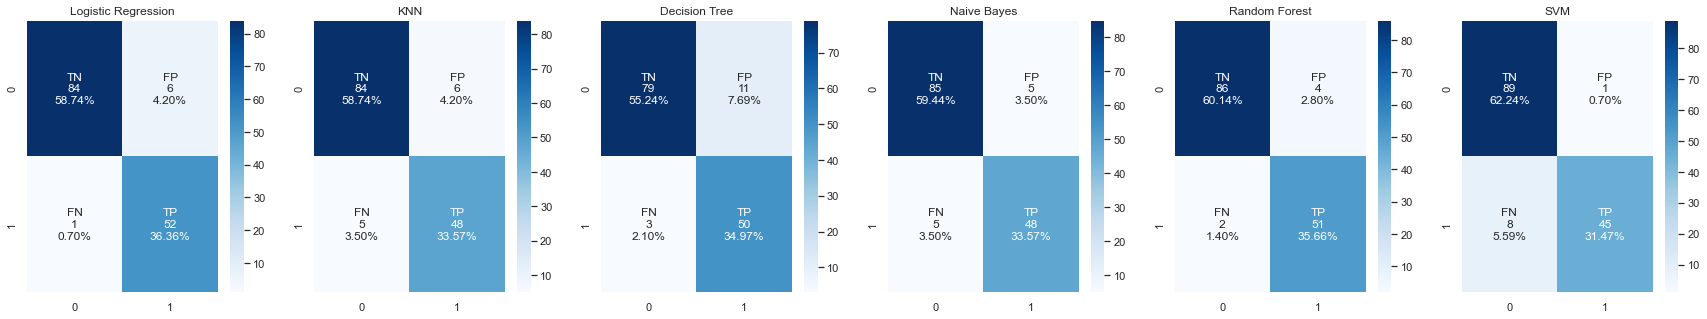

In [82]:
# izrada skupa podataka za treniranje i testiranje (uz odabir značajki)
# train i test set ostaju isti, samo što ćemo sada filtrirati, tj. odabrati samo one značajke koje imaju dovoljno veliku korelaciju sa ciljnom značajkom.

data_columns = select_features(MIN_CORR_TO_LABEL=0.5, MAX_CORR_TO_OTHER_FEATURE=1.0)
label_column = 'Diagnosis'

selected_features_train_x = train[data_columns]
selected_features_train_y = train[label_column]
selected_features_test_x = test[data_columns]
selected_features_test_y = test[label_column]

print(f'korišetno {len(data_columns)} značajki: {data_columns}')
evaluate_all_6_models_and_print_results(selected_features_train_x, selected_features_train_y, selected_features_test_x, selected_features_test_y)

U ovom primmjeru radili smo odabir značajki tako da samo filtriramo značajke koje imaju korelaciju prema ciljnoj manju od 0.5. 
Najveća točnost na testnom skupu iznosi 95.80% za Random Forest.
odabir značajki po međusobnoj korelaciji smo isključili tako da smo stavili MAX_CORR_TO_OTHER_FEATURE=1.0

### Pretraga po rešetci za optimalne hiperparametre koeficijenta korelacija

In [83]:
def get_correlation_grid_search_testing_accuracies_matrix(model, model_name, MIN_CORR_TO_LABEL_range, MAX_CORR_TO_OTHER_FEATURE_range):

    testing_accuraccies_matrix = np.zeros((len(MIN_CORR_TO_LABEL_range), len(MAX_CORR_TO_OTHER_FEATURE_range)))

    for i, i_min_corr_to_label in enumerate(MIN_CORR_TO_LABEL_range):
        for j, j_max_corr_to_other_feature in enumerate(MAX_CORR_TO_OTHER_FEATURE_range):
            data_columns = select_features(MIN_CORR_TO_LABEL=i_min_corr_to_label, MAX_CORR_TO_OTHER_FEATURE=j_max_corr_to_other_feature)
            label_column = 'Diagnosis'

            train_x = train[data_columns]
            train_y = train[label_column]
            test_x = test[data_columns]
            test_y = test[label_column]

            try:
                scores, cfm = train_and_evaluate_model(model, train_x, train_y, test_x, test_y)
                testing_accuraccies_matrix[i, j] = scores['test_accuracy_score']
            except ValueError:
                # ako nema nikakvih podataka za model, upiši točnost 0
                testing_accuraccies_matrix[i, j] = 0.0

    return testing_accuraccies_matrix


def grid_search_correlation(model, model_name):
    MIN_CORR_TO_LABEL_range = np.arange(0.0, 0.8, 0.1)
    MAX_CORR_TO_OTHER_FEATURE_range = np.arange(0.0, 1.0, 0.1)

    testing_accuracies_matrix = get_correlation_grid_search_testing_accuracies_matrix(model, model_name, MIN_CORR_TO_LABEL_range, MAX_CORR_TO_OTHER_FEATURE_range)

    #plt.rcParams["figure.figsize"] = (15,6)
    ax = sns.heatmap(testing_accuracies_matrix, annot=True, fmt=".3f", vmin=0.0, vmax=1.0)
    ax.set_xticklabels([f'{x:.2f}' for x in MAX_CORR_TO_OTHER_FEATURE_range])
    ax.set_yticklabels([f'{x:.2f}' for x in MIN_CORR_TO_LABEL_range], rotation=0)
    ax.set_xlabel('Maksimalna korelacija između značajki')
    ax.set_ylabel('Minmalna korelacija prema ciljnoj značajki')
    ax.set_title(f'Točnost na testnom skupu ovisno o hiperparametrima odabira značajki za model: {model_name}')

0
1
2
3
4
5


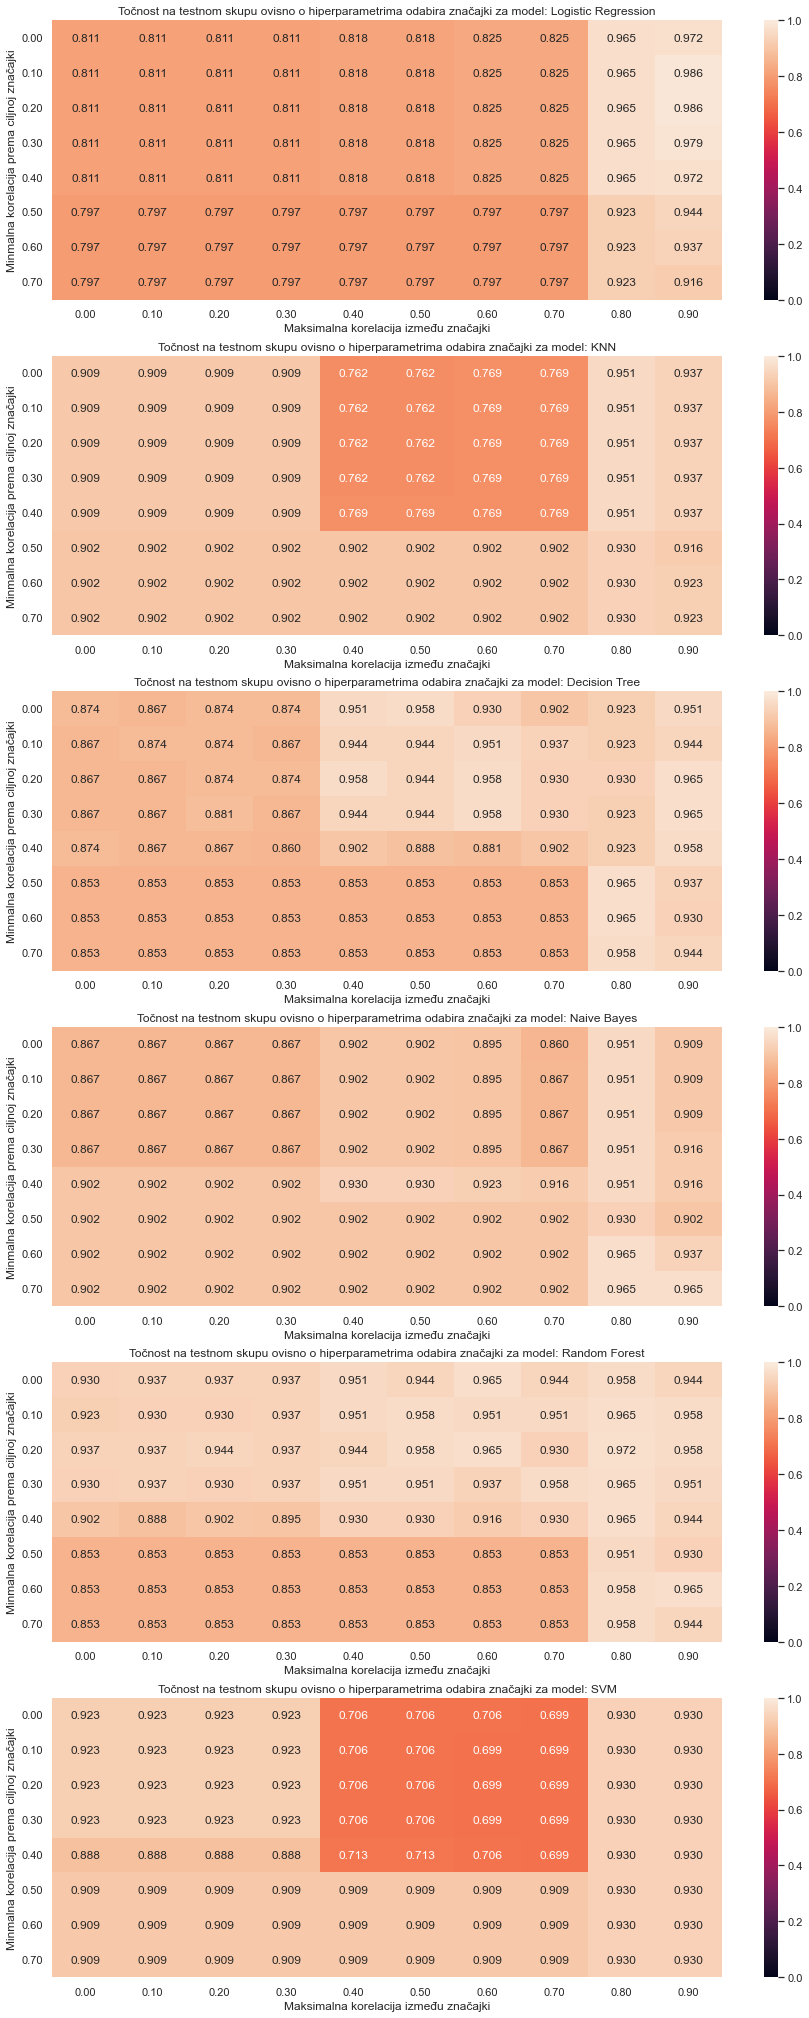

In [56]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), SVC()]
models_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM']

plt.rcParams["figure.figsize"] = (15, 6*len(models))

for i, (model, model_name) in enumerate(zip(models, models_names)):
    print(i)
    plt.subplot(len(models), 1, i+1)
    grid_search_correlation(model, model_name)    

Prilikom odabira značajki trebamo dva hiperparametra. Jedan je minimalna korelacija značajke prema ciljnoj značajki. Što je veći taj hiperparametar to će manje značajki ući u krajnje odabrane značajke.
Drugi hiperparametar je maksimalna korelacija između para značajki. Ako postoji par značajki koji ima međusobnu korelaciju veću od tog hiperparametra, jedna od tih značajki se izbacuje iz razmatranja. Što je manji taj hiperparametar, to će model manje značajki uzimati u obzir.

Tražimo optimalne hiperparametre pretragom po rešetci za svih 6 modela ovisno o točnosti na testnom skupu. U tablici što se krećemo više desno prema dolje to je model jednostavniji i koristi manje značajki. 

Optimalni hiperparametri koeficijenta korelacije za svaki od modela iznose:

| Algoritam           | Minimalna korelacije prema ciljnoj značajki | Maksimalna korelacija između značajki |
|---------------------|---------------------------------------------|---------------------------------------|
| Logistic Regression | 0.20                                        | 0.90                                  |
| KNN                 | 0.40                                        | 0.80                                  |
| Decision Tree       | 0.60                                        | 0.80                                  |
| Naive Bayes         | 0.70                                        | 0.90                                  |
| Random Forest       | 0.20                                        | 0.80                                  |
| SVM                 | 0.70                                        | 0.90                                  |


Najbolju testnu točnost ima model logističke regresije i to 98.6%

### Pronalazak optimalnih hiperparametara za SVM

In [60]:
MIN_CORR_TO_LABEL_range = np.arange(0.0, 0.8, 0.1)
MAX_CORR_TO_OTHER_FEATURE_range = np.arange(0.0, 1.0, 0.1)

best_corr_to_label = 0.0
best_corr_to_feature = 0.0
best_model = None
best_model_test_accuracy = 0.00

for corr_to_label in MIN_CORR_TO_LABEL_range:
    for corr_to_feature in MAX_CORR_TO_OTHER_FEATURE_range:
        data_columns = select_features(MIN_CORR_TO_LABEL=corr_to_label, MAX_CORR_TO_OTHER_FEATURE=corr_to_feature)
        label_column = 'Diagnosis'

        train_x = train[data_columns]
        train_y = train[label_column]
        test_x = test[data_columns]
        test_y = test[label_column]

        model = SVC()

        # Define the parameter grid
        param_grid = {'C': [0.1, 1, 10, 100, 1000],
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'kernel': ['rbf']}

        scoring_func = 'accuracy'

        # Create the grid search object
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_func)

        # Fit the grid search object to the training data
        grid_search.fit(train_x, train_y)

        # Get the best estimator
        best_model_i = grid_search.best_estimator_

        # Predict on the test set
        best_model_test_accuracy_i = accuracy_score(test_y, best_model_i.predict(test_x))

        if best_model_test_accuracy_i >= best_model_test_accuracy:
            best_corr_to_label = corr_to_label
            best_corr_to_feature = corr_to_feature
            best_model = best_model_i
            best_model_test_accuracy = best_model_test_accuracy_i

print(f'Optimal hyperparameters for SVM:')
print(f'MIN_CORR_TO_LABEL = {best_corr_to_label}')
print(f'MAX_CORR_TO_OTHER_FEATURE = {best_corr_to_feature}')
print(f'best model = {best_model}')
print(f'best model test accuracy = {best_model_test_accuracy:.3f}')

Optimal hyperparameters for SVM:
MIN_CORR_TO_LABEL = 0.4
MAX_CORR_TO_OTHER_FEATURE = 0.9
best model = SVC(C=10, gamma=0.0001)
best model test accuracy = 0.965


U ovom dijelu smo radili pretragu po rešetci (grid search) za 4 hiperparametra SVM modela. 2 su zaslužna za odabir značajki, a preostala 2 su C i gamma SVM modela.
Optimalan model SVM ima testnu pogrešku 0.965, a hiperparametri su ispisani u gornjoj ćeliji.